# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

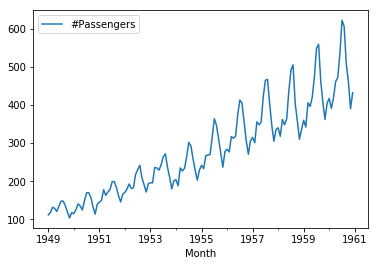

In [3]:
# Import necessary libraries
import pandas as pd

# Import passengers.csv
passengers = pd.read_csv('passengers.csv')

# setting index to the month & making that a time-series object
passengers.Month = pd.to_datetime(passengers.Month)
passengers.set_index('Month', inplace = True)

# plotting
passengers.plot()

In [4]:
# I see seasonality & trend

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [18]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

def stationarity_check(ts): 
    rolmean = ts.rolling(window=8, center=False).mean()
    rolstd = ts.rolling(window=8, center=False).std()
    dftest = adfuller(ts.iloc[:,0])

    # Dickey-Fulle test output
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print('Results of Dickey-Fuller Test:')
    print(dfoutput)
    
    
    # plotting original
    orig = plt.plot(ts, color='black',label='Original')
    
    # plotting rolling mean
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')

    # plotting rolling std
    std = plt.plot(rolstd, color='blue', label='Rolling Standard Deviation')
    
    plt.legend(loc='best')
    plt.title('Weighted Rolling Mean & Standard Deviation of Passenger Data')
    plt.show(block=False)
    


Use your newly created function on the airpassenger data set.

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


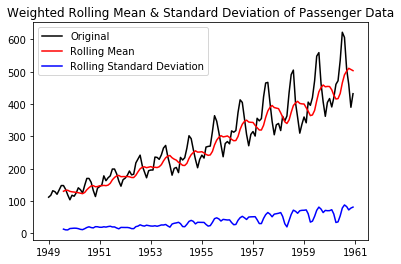

In [19]:
stationarity_check(passengers)

## Perform a log() and sqrt() transform

In [28]:
passengers.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

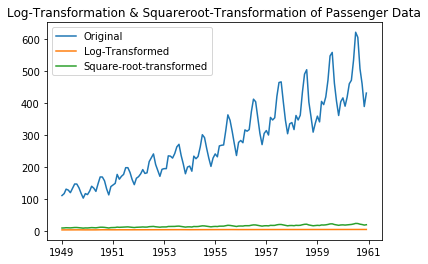

In [33]:
# Log transform timeseries and compare with original to check the effect

import numpy as np

logged_passengers = np.log(passengers)
sqrt_passengers = np.sqrt(passengers)


plt.plot(passengers, label='Original')
plt.plot(logged_passengers, label='Log-Transformed')
plt.plot(sqrt_passengers, label='Square-root-transformed')

plt.legend(loc='best')
plt.title('Log-Transformation & Squareroot-Transformation of Passenger Data')
plt.show(block=False)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

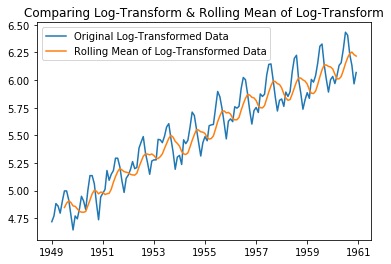

In [34]:
rolmean_log = logged_passengers.rolling(window=7, center=False).mean()

plt.plot(logged_passengers, label='Original Log-Transformed Data')
plt.plot(rolmean_log, label = 'Rolling Mean of Log-Transformed Data')
plt.legend(loc='best')
plt.title('Comparing Log-Transform & Rolling Mean of Log-Transform')
plt.show(block=False)

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [62]:
# Subtract the moving average from the original data and check head for Nans

data_minus_rolmean = logged_passengers - rolmean_log

# np.log(ts) - rolmean

data_minus_rolmean.isnull().values.sum()

6

In [63]:
# Drop the NaN values from timeseries calculated above
data_minus_rolmean.dropna(inplace=True)

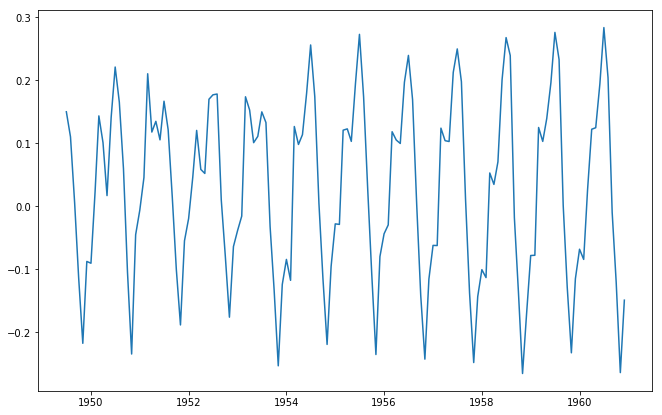

In [64]:
# Plot the result
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_rolmean)

Finally, use your function `check_stationarity` to see if this series is considered stationary!

Results of Dickey-Fuller Test:
Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


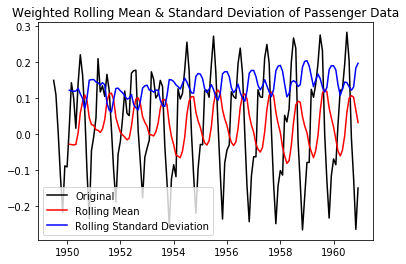

In [65]:
# Your code here


stationarity_check(data_minus_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?
The time series are not stationary, as the p-value is still substantial (0.15) and the t-statistic is larger than the 10% critical value.

## Subtracting the weighted rolling mean

Repeat all the above for the *weighted* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

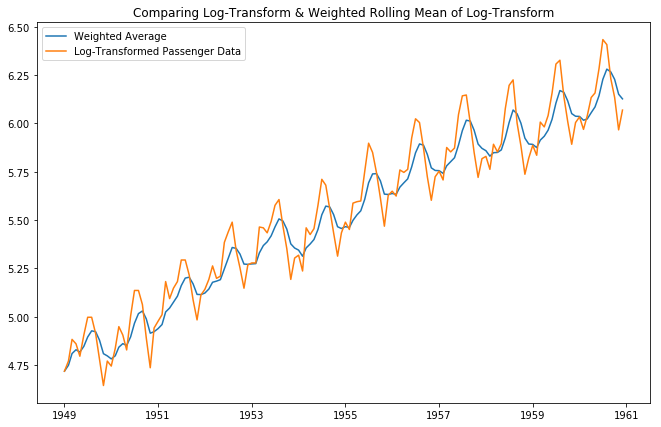

In [76]:
# Use Pandas ewm() to calculate Weighted Moving Average of ts_log

# Weighted mean
weighted_rolmean = logged_passengers.ewm(halflife = 2).mean()

# Subtracting weighted mean from log-transformed dataframe
data_minus_weighted_rolmean = logged_passengers - weighted_rolmean

# checking for null values
data_minus_rolmean.isnull().values.sum()

# subtracting null values 
data_minus_rolmean.dropna(inplace=True)

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(11,7))
plt.plot(weighted_rolmean, label='Weighted Average')
plt.plot(logged_passengers, label = 'Log-Transformed Passenger Data')
plt.legend(loc='best')
plt.title('Comparing Log-Transform & Weighted Rolling Mean of Log-Transform')
plt.show(block=False)

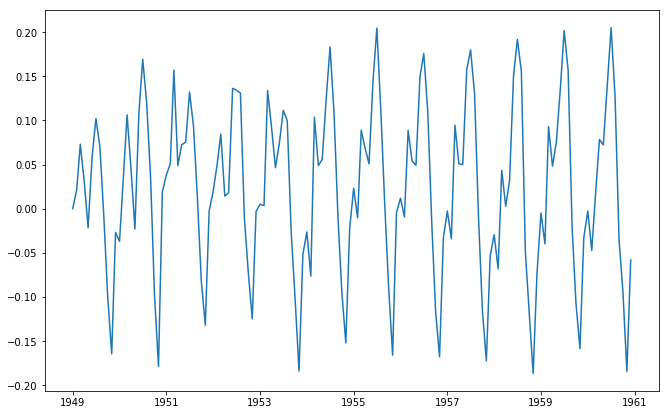

In [74]:
# Subtract the moving average from the original data and plot
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_weighted_rolmean)

Results of Dickey-Fuller Test:
Test Statistic                  -3.087696
p-value                          0.027477
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


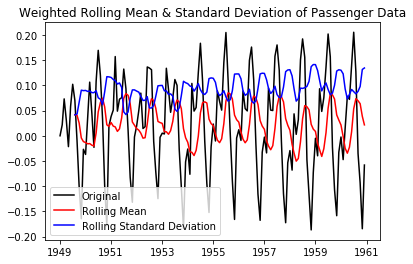

In [75]:
# do a stationarity check
stationarity_check(data_minus_weighted_rolmean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?

Now it's stationary! There is still high seasonality, though.

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [85]:
# difference your data and look at the head
differencing = data_minus_weighted_rolmean.diff(periods=12)

differencing.head()



,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


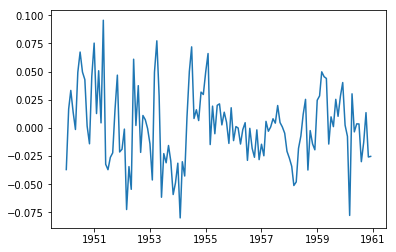

In [86]:
# plot your differenced time series

plt.plot(differencing)

In [87]:
# drop nas

differencing.dropna(inplace=True)

Results of Dickey-Fuller Test:
Test Statistic                  -4.158133
p-value                          0.000775
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


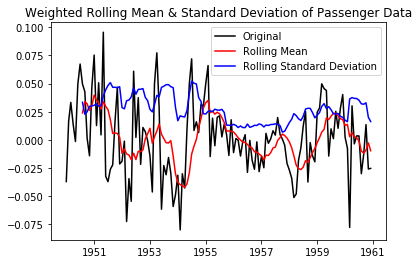

In [88]:
# perform the stationarity check

stationarity_check(differencing)

### Your conclusion

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.